# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
#from scipy import stats
from pprint import pprint

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 595


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# try this later to get results in celsius rather than kelvin

# units = 'metric'
# url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}"


In [4]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto ayora
Processing Record 2 of Set 1 | udachny
Processing Record 3 of Set 1 | illizi
Processing Record 4 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 5 of Set 1 | whitehorse
Processing Record 6 of Set 1 | margaret river
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | saint-francois
Processing Record 10 of Set 1 | armacao de buzios
Processing Record 11 of Set 1 | georgetown
Processing Record 12 of Set 1 | jamestown
Processing Record 13 of Set 1 | adamstown
Processing Record 14 of Set 1 | inhambane
Processing Record 15 of Set 1 | college
Processing Record 16 of Set 1 | iqaluit
Processing Record 17 of Set 1 | egilsstadir
Processing Record 18 of Set 1 | yellowknife
Processing Record 19 of Set 1 | beloyarskiy
Processing Record 20 of Set 1 | afaahiti
Processing Record 21 of Set 1 | bethel
Processin

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto ayora,-0.7393,-90.3518,294.57,97,88,2.68,EC,1720827203
1,udachny,66.4167,112.4000,298.11,54,26,4.52,RU,1720827204
2,illizi,26.4833,8.4667,305.04,18,0,4.29,DZ,1720827206
3,whitehorse,60.7161,-135.0538,290.43,48,75,7.72,CA,1720827168
4,margaret river,-33.9500,115.0667,284.02,78,97,2.84,AU,1720827209


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto ayora,-0.7393,-90.3518,294.57,97,88,2.68,EC,1720827203
1,udachny,66.4167,112.4000,298.11,54,26,4.52,RU,1720827204
2,illizi,26.4833,8.4667,305.04,18,0,4.29,DZ,1720827206
3,whitehorse,60.7161,-135.0538,290.43,48,75,7.72,CA,1720827168
4,margaret river,-33.9500,115.0667,284.02,78,97,2.84,AU,1720827209


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

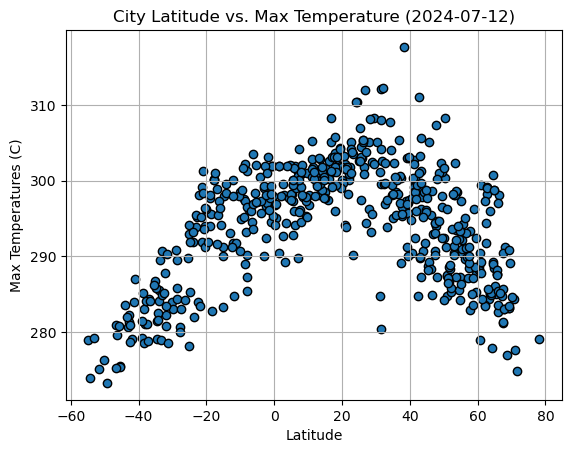

<Figure size 640x480 with 0 Axes>

In [12]:
# scatter plot for latitude vs. temperature
lat = city_data_df['Lat']
temp = city_data_df['Max Temp']
plt.scatter(lat, temp, edgecolors='black')

# other graph properties
plt.title('City Latitude vs. Max Temperature (2024-07-12)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperatures (C)')
plt.grid(True)

plt.show()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

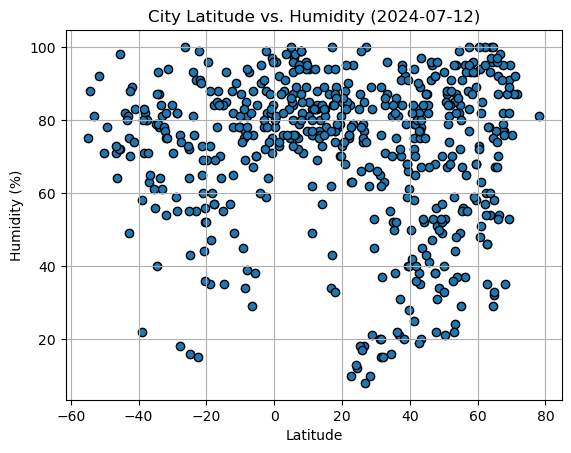

In [15]:
# scatter plot for latitude vs. humidity
lat = city_data_df['Lat']
hum = city_data_df['Humidity']
plt.scatter(lat, hum, edgecolors='black')

# other graph properties
plt.title('City Latitude vs. Humidity (2024-07-12)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

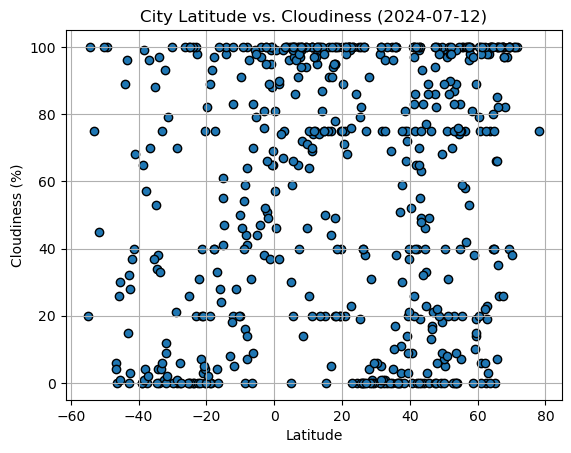

In [17]:
# Build the scatter plots for latitude vs. cloudiness
lat = city_data_df['Lat']
cloud = city_data_df['Cloudiness']
plt.scatter(lat, cloud, edgecolors='black')

# other graph properties
plt.title('City Latitude vs. Cloudiness (2024-07-12)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

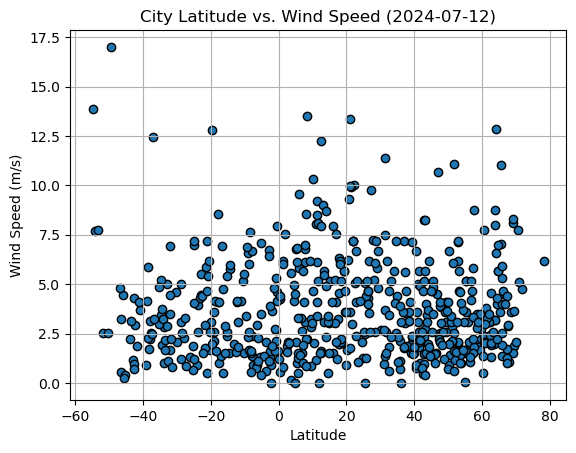

In [20]:
# Build the scatter plots for latitude vs. wind speed
lat = city_data_df['Lat']
wind = city_data_df['Wind Speed']
plt.scatter(lat, wind, edgecolors='black')

# other graph properties
plt.title('City Latitude vs. Wind Speed (2024-07-12)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [77]:
# Define a function to create Linear Regression plots
def linear_regression(x, y, xlabel='X-axis', ylabel='Y-axis'):
    
    slope, intercept, r, p, std_err = linregress(x, y)

    line = slope * x + intercept

    plt.scatter(x, y)
    plt.plot(x, line, "-", color='red', label=f"y={slope:.2f}x + {intercept:.2f}")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f"{xlabel} vs {ylabel}")

    eqn = f"y = {slope:.2f}x + {intercept:.2f}"
    plt.annotate(eqn, xy=(0.05, 0.95), xycoords='axes fraction', fontsize=14, color='red')

    r_squared = r ** 2
    
    print(f"The r^2 value is: {r_squared}")
    
    plt.show()

In [41]:
city_data_df.columns

Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')

In [42]:
# DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,udachny,66.4167,112.4000,298.11,54,26,4.52,RU,1720827204
2,illizi,26.4833,8.4667,305.04,18,0,4.29,DZ,1720827206
3,whitehorse,60.7161,-135.0538,290.43,48,75,7.72,CA,1720827168
7,saint-francois,46.4154,3.9054,284.84,95,17,1.54,FR,1720827213
9,georgetown,5.4112,100.3354,300.11,84,20,1.03,MY,1720827215


In [43]:
# DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto ayora,-0.7393,-90.3518,294.57,97,88,2.68,EC,1720827203
4,margaret river,-33.9500,115.0667,284.02,78,97,2.84,AU,1720827209
5,port-aux-francais,-49.3500,70.2167,273.25,78,100,17.01,TF,1720827210
6,ushuaia,-54.8000,-68.3000,278.96,75,20,13.89,AR,1720826990
8,armacao de buzios,-22.7469,-41.8817,295.18,91,98,5.50,BR,1720827214


###  Temperature vs. Latitude Linear Regression Plot

The r^2 value is: 0.36454509578394634


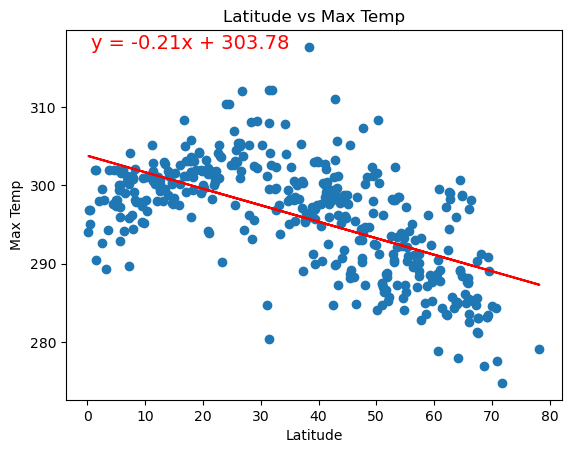

In [78]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']
xlabel = 'Latitude'
ylabel = 'Max Temp'

linear_regression(x, y, xlabel, ylabel)

The r^2 value is: 0.6849992666822424


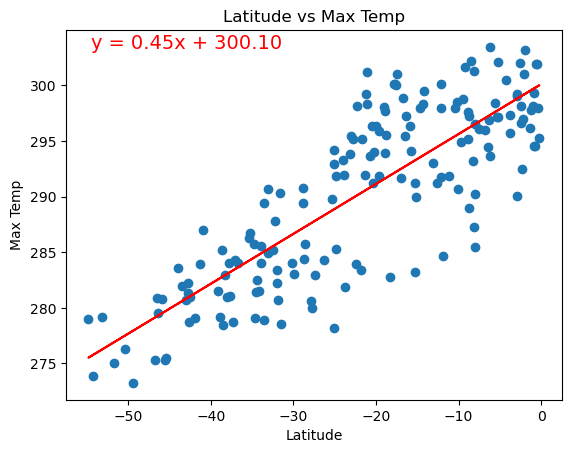

In [80]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']
xlabel = 'Latitude'
ylabel = 'Max Temp'

linear_regression(x, y, xlabel, ylabel)

**Discussion about the linear relationship:** 

In the Northern Hemisphere, the r^2 value of approximately 0.365 indicates that 36.5% of the variation in Max Temperature can be explained by Latitude, suggesting a moderate level of relationship. 

Conversely, in the Southern Hemisphere, the higher r^2 value of approximately 0.685 indicates that 68.5% of the variation in Max Temperature can be explained by Latitude, indicating a stronger relationship between Latitude and Max Temperature in this hemisphere.
."

### Humidity vs. Latitude Linear Regression Plot

In [81]:
northern_hemi_df.columns

Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')

The r^2 value is: 0.017832792952298636


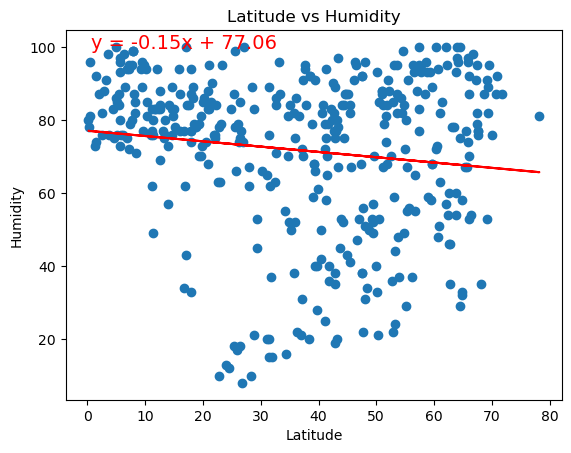

In [82]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity']
xlabel = 'Latitude'
ylabel = 'Humidity'

linear_regression(x, y, xlabel, ylabel)

The r^2 value is: 0.0010621257484343843


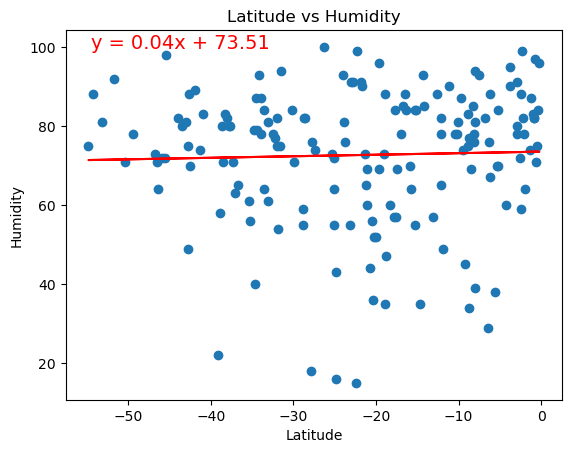

In [83]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']
xlabel = 'Latitude'
ylabel = 'Humidity'

linear_regression(x, y, xlabel, ylabel)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [84]:
northern_hemi_df.columns

Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')

The r^2 value is: 0.012661349795854869


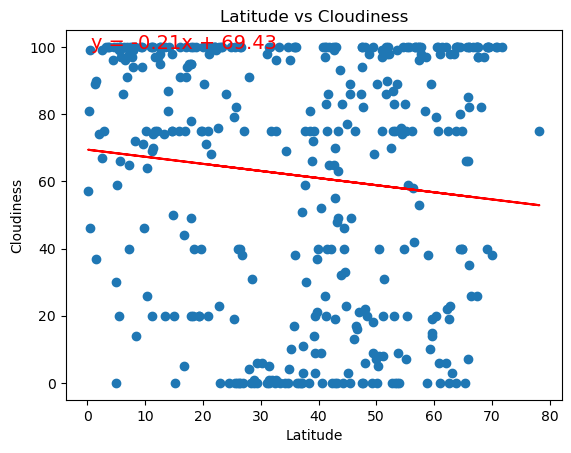

In [85]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Cloudiness']
xlabel = 'Latitude'
ylabel = 'Cloudiness'

linear_regression(x, y, xlabel, ylabel)

The r^2 value is: 0.06482989352484073


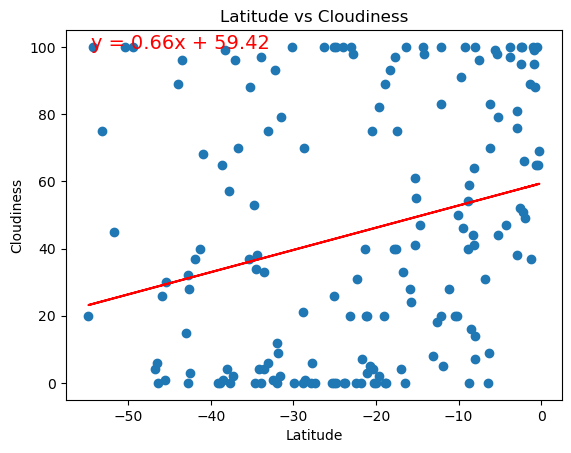

In [86]:
# ______________________________________________THIS SEEMS OFF - ASK LUNA!!!!!!____________________________________________

# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']
xlabel = 'Latitude'
ylabel = 'Cloudiness'

linear_regression(x, y, xlabel, ylabel)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r^2 value is: 0.011094860235100102


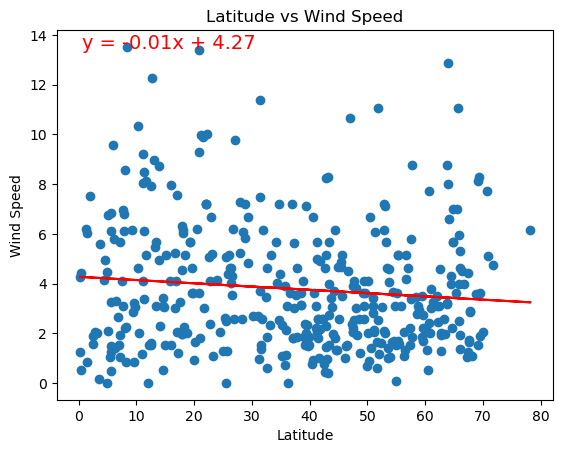

In [87]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Wind Speed']
xlabel = 'Latitude'
ylabel = 'Wind Speed'

linear_regression(x, y, xlabel, ylabel)

The r^2 value is: 0.017041915688147304


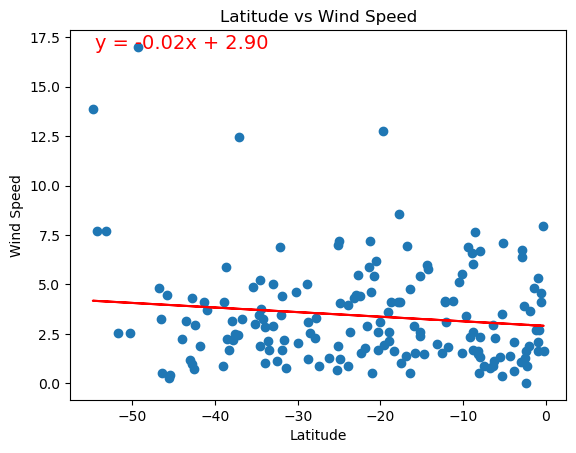

In [88]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed']
xlabel = 'Latitude'
ylabel = 'Wind Speed'

linear_regression(x, y, xlabel, ylabel)

**Discussion about the linear relationship:** YOUR RESPONSE HERE